# Lab 5.1: Logistic Regression

In this part of the lab we will explore using logistic regression to perform binary classification. 

To see it in action we will consider some simple data from the scikit learn library. This data is actually 3 classes with 4 features but we will restrict it to 2 classes for simplicity.

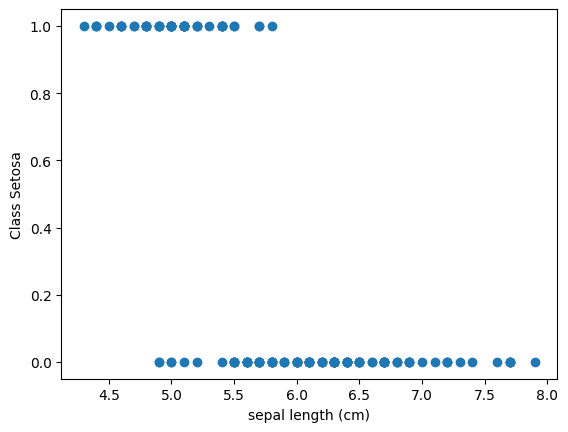

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Using sklearn's version of the Iris dataset
iris = load_iris()

# Extract the sepal length to use as a 1d feature
x = iris.data[:,0]

# Create a output class that is 1 for the Iris Setosa class but 0 for either Iris Versicolor or Virginica
# The astype(np.float64) is simply to convert it from bool to the same type as x
y = (iris.target == 0).astype(np.float64)

# Let's look at the data
plt.scatter(x, y)
plt.ylabel('Class Setosa')
plt.xlabel(iris.feature_names[0])
plt.show()

As we can see there is some overlap between the classes but we have otherwise converted it into a binary classification problem.

Now, let's remind ourselves of the format the logistic regression takes. Since there are 2 discrete output classes (Iris Setosa, Not Iris Setosa) then with logistic regression we are using the Bernoulli distribution to model this output. The Bernoulli distribution describes a random variable that is 0 or 1 for a given probability $\pi$. The probabilty distribution is described mathematically as
$$ P(Y = y ) = \pi^y (1-\pi)^{(1-y)} $$
where $y=0$ or $1$. $\pi$ is the probability that the random variable is 1 and is the only constant to define the distribution. However, in logistic regression we need to learn how this parameter depends on our input features (and bias) to best describe our data. Specifically we will perform the same weighted sum of our input features but apply the logistic sigmoid function to it to convert it into a probability. This gives 
$$ \pi(\mathbf{x}) = \mathrm{Sigmoid}(\mathbf{w}^T \mathbf{x}) $$
where $\mathbf{w} = (w_0, w_1, ... w_D)$ is the weight vector for $D$ dimension input features and we augment the input vector a bias so that $\mathbf{x} = (1, x_1, ..., x_D)$. The sigmoid function given by
$$ \mathrm{Sigmoid}(z) = \frac{1}{1+\exp(-z)}. $$

In this example, we have only 1 input feature so we can simplify the linear weighted sum to $\mathbf{w}^T \mathbf{x} = w_0 + w_1 x$.
To start, I will define the sigmoid function and we can plot this against our data for a few values of $w_0$ and $w_1$.

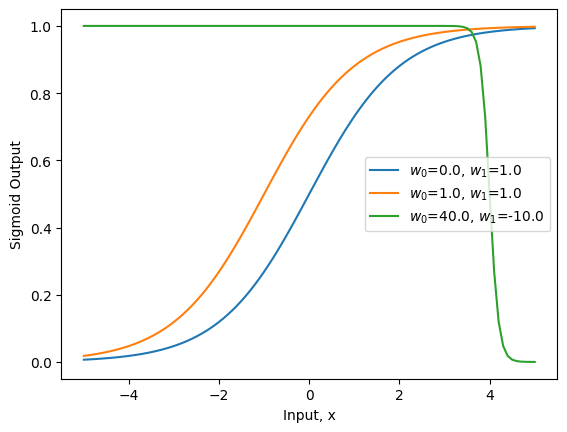

In [25]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
# y = mx + C
#  y = w1*x + w0 .
def f(x, w0, w1):
    return w0 + w1*x

linx = np.linspace(-5, 5, 101)
w0 = 0.0; w1 = 1.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')

w0 = 1.0; w1 = 1.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')

w0 = 40.0; w1 = -10.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')

#w0 = -40.0; w1 = -10.0
#plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')

plt.ylabel('Sigmoid Output')
plt.xlabel('Input, x')
plt.legend()
plt.show()

### Question 1:
What affect do the parameters $w_0$ and $w_1$ have on the resulting shape of the curve?

---

Write your answer here

---

In [ ]:
# Logistic focus only binary classification for this lab
# The weight have affected on the curve.
# For W0 it is the intercept Y which shift graph to the left and right
# For W1 is W1*x , 
# if W1 is positive then its increase transition from 0 ->1 , 
# if W1 is negative then its decrease transition from 1->0 


## The decision boundary
Since the sigmoid function will be used to give us a probability of class as the output, we then need to decide how we classify based on these probabilities. The simplest is that we assign a data point to the class with the largest probability. So if we have $P(Y=0|x) = 0.8$ and $P(Y=1|x) = 0.2$ then the probability is greater for $Y=0$ so we would assign this data point to that discrete output value (i.e class 0 or the negative class). In this case, we have a boundary between the classes that is defined by $P(Y=0|x) = P(Y=1|x) = 0.5$. Within the model we are defining $P(Y=1 | x) = \pi(x) = \mathrm{Sigmoid}(w_0 + w_1 x)$ and we can identify that the sigmoid function is equal to 0.5 when $w_0 + w_1 x = 0$. This defines the decision boundary. Note that for this 1d data, it provides us a point value, but for 2d it will define a line. Generally, for D dimensional data the decision boundary is $D-1$ dimensional.

### Question 2
Given that $w_0 + w_1 x = 0$ defines the boundary, determine the value of $x$ that is the boundary in terms of $w_0$ and $w_1$. For the 3 sets of $w_0$ and $w_1$ above, calculate the boundary value. Do the values agree with the plot?

---
Write your answer here.

---



x1 :  -0.0
x2 :  -1.0
x3 :  4.0


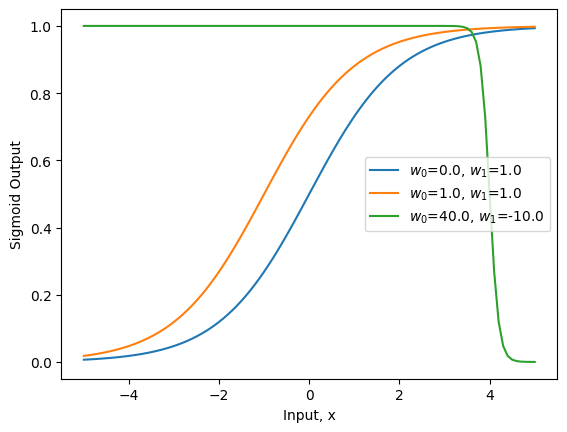

In [28]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
# y = mx + C
#  y = w1*x + w0 .
def f(x, w0, w1):
    return w0 + w1*x

linx = np.linspace(-5, 5, 101)

w0 = 0.0; w1 = 1.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')
print('x1 : ', -w0/w1 )

w0 = 1.0; w1 = 1.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')
print('x2 : ', -w0/w1 )

w0 = 40.0; w1 = -10.0
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')
print('x3 : ', -w0/w1 )

plt.ylabel('Sigmoid Output')
plt.xlabel('Input, x')
plt.legend()
plt.show()

## Optimisation

Now that we have defined our model, we now need to find the optimal parameters for $w_0$ and $w_1$. Recall from the lecture that we will do this by find that parameters that maximise the total joint likelihood of the data. Using the assumption that our data samples are independent the likelihood over all our data is
$$ P(\mathbf{y} | \mathbf{x}) = \prod_{i=1}^N P(y_i | x_i) = \prod_{i=1}^N  \pi^{y_i} (1-\pi)^{(1-y_i)} $$
where we have used the probability defined from the Bernoulli distribution and $\pi = \pi(x_i)$ i.e is a function of the inputs.

Given our data and some values for the weights we can calculate what this likelihood value will be.

In [30]:
def Bernoulli(y, pi):
    return np.power(pi, y) * np.power((1-pi), (1-y))

def total_likelihood(x, y, w0, w1):
    pi = sigmoid(w0 + w1*x)
    likelihoods = Bernoulli(y, pi)
    return np.prod(likelihoods)

# Now we can compute the likelihoods of our curves from earlier

w0 = 0.0; w1 = 1.0
print(f'w_0={w0}, w_1={w1}: ', total_likelihood(x, y, w0, w1))

w0 = 1.0; w1 = 1.0
print(f'w_0={w0}, w_1={w1}: ', total_likelihood(x, y, w0, w1))

w0 = 40.0; w1 = -10.0
print(f'w_0={w0}, w_1={w1}: ', total_likelihood(x, y, w0, w1))



w_0=0.0, w_1=1.0:  6.161984018493903e-273
w_0=1.0, w_1=1.0:  3.32146446e-316
w_0=40.0, w_1=-10.0:  3.13177627518897e-219


These values are vanishingly small, partly because they are poor paramter choices but primarily because the product over multiple samples of values less than 1 gets increasingly small. This is one reason why it's better to use the log likelihood.

This is given by
$$ \log P(\mathbf{y} | \mathbf{x}) = \sum_{i=1}^N \log P(y_i | x_i) = \sum_{i=1}^N \left[ y_i \log (\pi(x_i)) + (1-y_i)\log (1-\pi(x_i)) \right] $$

### Question 3
Using the definition of the Bernoulli distribution, proove that $\log P(y_i | x_i) = y_i \log (\pi(x_i)) + (1-y_i)\log (1-\pi(x_i))$.

---

Write your answer here

---

Now we can compute this instead.

In [ ]:
def log_likelihood(x, y, w0, w1):
    pi = sigmoid(w0 + w1*x)
    li = y * np.log(pi) + (1-y)*np.log(1-pi)
    return np.sum(li)

w0 = 0.0; w1 = 1.0
print(f'w_0={w0}, w_1={w1}: ', log_likelihood(x, y, w0, w1))

w0 = 1.0; w1 = 1.0
print(f'w_0={w0}, w_1={w1}: ', log_likelihood(x, y, w0, w1))

w0 = 40.0; w1 = -10.0
print(f'w_0={w0}, w_1={w1}: ', log_likelihood(x, y, w0, w1))

Now these are much more managable in terms of optimisation. Although we do need to be careful if $\pi=0$ as this will give errors for the log function. We can see that the last parameter set is better than the others but can still be improved significantly. We can now look to use gradient descent to learn these weights by minimising the negative log likelihood (nll). Recall from the lecture, that to perform gradient descent we update our parameters using the gradient of the loss function with respect to the weights. For the negative log likelihood, this becomes
$$ w_0^\mathrm{new} = w_0^\mathrm{old} + \eta \sum_i^{N} \left[ y_i - \pi(x_i) \right] $$
and
$$ w_1^\mathrm{new} = w_1^\mathrm{old} + \eta \sum_i^{N} \left[ y_i - \pi(x_i) \right] x_i $$

Below there is a skeleton code for computing gradient descent. Complete the code to iteratively update the weights. You should find the log likelihood reaches a final value around -36.


In [ ]:
# These are some variable to adjust the loop.
eta = 0.005
N_steps = 1000  #You may need to increase this to train for longer
N_print = 100

# Some sensible starting values, we might not know this and might need to start randomly
w0 = 4
w1 = -1

for i in range(N_steps):
    # Uncomment and calculate the weight update here
    #w0 = w0 + ...
    #w1 = w1 + ... 

    # Every N_print steps tell us the weight values and current log likelihood
    if ((i + 1 )% N_print == 0):
        ll = log_likelihood(x, y, w0, w1)
        print(f'w0 = {w0:6.4f}, w1 = {w1:6.4f}: Log likelihood = {ll:10.6f}') 

To assess how well the model is doing, we can plot it against our training data to observe if the probability matches where the Setosa data points are found.

In [ ]:
# Plot the original iris data from before
plt.scatter(x, y)

# Plot our learned probability function over this range
linx = np.linspace(np.min(x), np.max(x))
plt.plot(linx, sigmoid(f(linx, w0, w1)), label = f'$w_0$={w0}, $w_1$={w1}')

plt.ylabel('Class Setosa')
plt.xlabel(iris.feature_names[0])
plt.show()

If your gradient descent has worked well then you should find that it has a reasonable agreement. Ideally we should hold out some test data to measure the classification performance. However, before we do that let's move into more dimensions. We had only 1 feature, now let's take 2.



In [ ]:
# Extract the sepal length to use as a 1d feature
x1 = iris.data[:,0]
x2 = iris.data[:,1]

# Let's look at the data
plt.scatter(x1, x2, c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

From this plot we can see that the sepal length and sepal width together can give a good separation of the Setosa class from the rest. The logistic regression model follows in the same way now but the main difference is that the probability function now takes both $x_1$ and $x_2$ as inputs for each sample variable, i.e
$$ \pi(x_{i1}, x_{i2}) = \mathrm{Sigmoid}(w_0 + w_1 x_{i1} + w_2 x_{i2} ) $$
where we have added $w_2$ as the weight for the new dimension and we have added $i$ as the subscript just to identify that $x_{ij}$ is feature $j$ of data point $i$. First, let's visualise the sigmoid function over these two feature dimension.

In [ ]:
from matplotlib import cm

linx1 = np.linspace(np.min(x1), np.max(x1))
linx2 = np.linspace(np.min(x2), np.max(x2))

x1grid, x2grid = np.meshgrid(linx1, linx2)

w0 = 20; w1 = -5; w2 = 5
pgrid = sigmoid(w0 + w1*x1grid + w2*x2grid)

plt.contourf(x1grid, x2grid, pgrid, levels = 50, cmap=cm.coolwarm)
plt.colorbar()

# Add the data for comparison
plt.scatter(x1, x2, c=y)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


# Or as a 3d projection plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x1grid, x2grid, pgrid, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel('Sigmoid probability')



## Decision boundary in 2d
Like in the 1d case, we have a boundary between the 2 classes that is given when the probability is 0.5, and when the input to the sigmoid function equals zero. In this 2d case this means
$$ w_0 + w_1 x_1 + w_2 x_2 = 0$$
where I have dropped the $i$ for clarity and the subscript only refers to feature dimension.

### Question 4
Usning the equation above, rearrange this to find a function that describes the decision boundary. We want to express $x_2$ in terms of $x_1$ and the weights. It should have the form of $x_2 = m x_1 + c$. Try plotting this line on top of the contour map above, does it align to the probability values?

## Optimising the weights in 2d
We can go back to our implementation of gradient descent and update it to include the new data. The update rules will now take the form 
$$ w_0^\mathrm{new} = w_0^\mathrm{old} + \eta \sum_i^{N} \left[ y_i - \pi(x_{i1}, x_{i2}) \right] $$
$$ w_1^\mathrm{new} = w_1^\mathrm{old} + \eta \sum_i^{N} \left[ y_i - \pi(x_{i1}, x_{i2}) \right] x_{i1} $$
$$ w_2^\mathrm{new} = w_2^\mathrm{old} + \eta \sum_i^{N} \left[ y_i - \pi(x_{i1}, x_{i2}) \right] x_{i2} $$

Implement these equations below and train the model to find good values for the weights.

In [ ]:
def log_likelihood_2d(x, y, w0, w1,w2):
    pi = sigmoid(w0 + w1*x1 + w2*x2)
    li = y * np.log(pi) + (1-y)*np.log(1-pi)
    return np.sum(li)

# These are some variable to adjust the loop.
eta = 0.005
N_steps = 1000  #You may need to increase this to train for longer
N_print = 100

# Some sensible starting values, we might not know this and might need to start randomly
w0 = 20; w1 = -5; w2 = 5

for i in range(N_steps):
    # Uncomment and calculate the weight update here
    #w0 = w0 + ...
    #w1 = w1 + ... 
    #w2 = w2 + ...

    # Every N_print steps tell us the weight values and current log likelihood
    if ((i + 1 )% N_print == 0):
        ll = log_likelihood_2d(x, y, w0, w1, w2)
        print(f'w0 = {w0:6.4f}, w1 = {w1:6.4f}, w2 = {w2:6.4f}: Log likelihood = {ll:10.6f}') 

Hopefully if the training runs well you should find that the new 2d probability function matches the data well. Better than it did with only 1 dimension. 

In [ ]:
p = sigmoid(w0 + w1*x1grid + w2*x2grid)

plt.contourf(x1grid, x2grid, p, levels = 50, cmap=cm.coolwarm)
plt.colorbar()

# Add the data for comparison
plt.scatter(x1, x2, c=y)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Finally, we can compare our results to the LogisticRegression model from the sklearn library. This minimise the objective function using a more advanced method than gradient descent, which is much faster, and includes a L1 or L2 penalty term. This will lead to a slightly different solution but we can hopefully find a similar decision boundary.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris.data[:, :2]

lr_model = LogisticRegression().fit(X, y)

Xgrid = np.stack([x1grid, x2grid])
grid_shape = Xgrid.shape
probs = lr_model.predict_proba(Xgrid.reshape(2, -1).T)
print(probs.shape)

plt.contourf(x1grid, x2grid, probs[:,1].reshape(grid_shape[1:]),  levels = 50, cmap=cm.coolwarm)

# Add the data for comparison
plt.scatter(x1, x2, c=y)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### Further work

This notebook has given you are run through the internal workings of the logistic regression model and how we can use gradient descent to optimise it. Here are a few ideas for you to try out to understand this in more detail:
1) Split the dataset into a training and test split (use [scikit-learns train-test split function](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) for example ) and evaluate how many correct predictions the model makes on the test set using our 1d and 2d versions.
2) Use the full 4 dimensions of the Iris data set, adapt the gradient descent to upate all 5 weight parameters.
3) Use the scikit-learn logistic regression model. Take a look at the [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) and see what options are available. Try changing the regularisation strength, how does that improve the classification.
4) Try to classify a different Iris flower, is it easier or harder.